# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [12]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

df = pd.read_csv('data/human_body_temperature.csv')

In [3]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [17]:
df.describe(include='all')

,temperature,gender,heart_rate
count,130.000000,130,130.000000
unique,NaN,2,NaN
top,NaN,F,NaN
freq,NaN,65,NaN
mean,98.249231,NaN,73.761538
std,0.733183,NaN,7.062077
min,96.300000,NaN,57.000000
25%,97.800000,NaN,69.000000
50%,98.300000,NaN,74.000000
75%,98.700000,NaN,79.000000


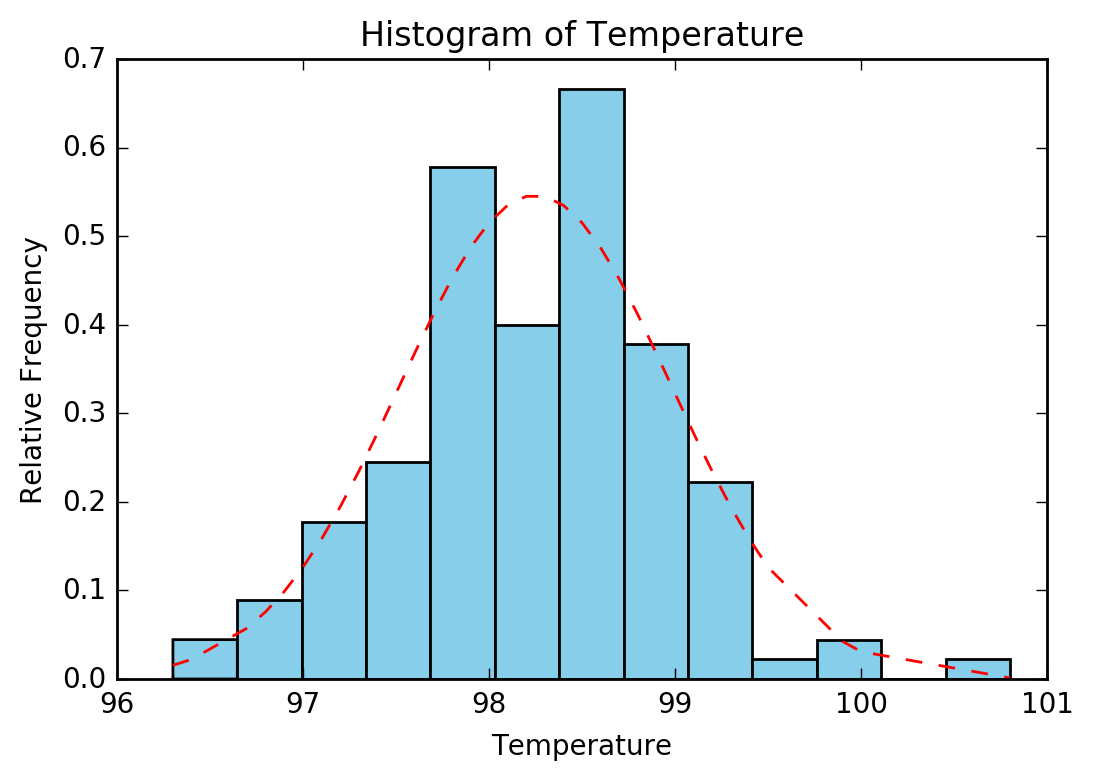

In [49]:
tempmean = np.mean(df.temperature)
tempstd = np.std(df.temperature)

dftempsorted = sorted(df.temperature)

temppdf = stats.norm.pdf(dftempsorted, tempmean, tempstd)

plt.plot(dftempsorted, temppdf, 'r--')
plt.hist(dftempsorted, bins=13, normed=True, color='skyblue')
plt.xlabel('Temperature')
plt.ylabel('Relative Frequency')
plt.title('Histogram of Temperature')
plt.show()

## 1. Is the distribution of body temperatures normal?

_The above graph shows the normalized histogram of temperatures, with an overlay of the normal PDF with the mean and standard deviation taken from the temperature data. The normal pdf fits relatively well over the histogram. Therefore, I am confident in assuming that this sample data is approximately normal._

_Given that we are dealing with a human attribute (body temperature), I am also confident in assuming that the population is normally distributed as well._

## 2. Is the sample size large? Are the observations independent?
_Since the sample size is greater than 100 (n=130), the sample size can be considered large._

_The researchers used a random sampling method to obtain their data. These observations must be independent - an individual's body temperature should not be dependent on the the body temperatures of other individuals._

## 3. Is the true population mean really 98.6 degrees F?
* Would you use a one-sample or two-sample test? Why?
* In this situation, is it appropriate to use the  $t$  or  $z$  statistic?
* Now try using the other test. How is the result be different? Why?

_A one-sample test will be used. It doesn't make sense to use a two-sample test here, unless we're comparing some kind of difference in the samples (such as male body temperature versus female body temperature._

_The $z$ statistic can be used here since the sample size is relatively large (n=130)._

_Below, I will calculate the $z$-score for the null hypothesis that the true population mean is 98.6 degrees versus the alternative that it is not._

In [53]:
tempzscore = (tempmean - 98.6)/(tempstd/np.sqrt(130))
tempzscore

-5.4759252020781162

In [54]:
temppvalue = stats.norm.cdf(tempzscore)
temppvalue

2.1761575829410943e-08

_The $z$-score given is -5.48. This leads to a p-value of approximately 0. Therefore the null hypothesis should be rejected. The true population mean appears to be different than 98.6 degrees._

_The $t$-score would be calculated the same way._

In [56]:
temptvalue = stats.ttest_1samp(df.temperature, 98.6)
temptvalue

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

_The $t$-test gives the same answer - a p-value of close to 0 - which supports the previous conclusion that the null hypothesis should be rejected._

## 4. At what temperature should we consider someone's temperature to be "abnormal"?
* Start by computing the margin of error and confidence interval.

_Margin of error is the sample standard deviation divided by the square root of the observations in the sample multipled by the relative $z$ or $t$ statistic you are using for significance. A 95% signficance level will be used along with the $z$ statistic. A $z$-score of 1.96 will be used - 1.96 corresponds to probabilities of (.025, .975) which give the 95% significance._

In [58]:
temperror = tempstd / np.sqrt(130)
temperror = temperror * 1.96
temperror

0.12555096480257899

_The margin of error is +/- 0.13 degrees. Therefore, a 95% confidence interval for the true population body temperature mean is:_

__98.25 +/- 0.13__ _or equivalently_ __(98.12, 98.38)__

_This means that an individual could be considered abnormal (in the lower 2.5% or upper 2.5% of the population) if their body temperature falls under 98.12 degrees or above 98.38 degrees._

## 5. Is there a significant difference between males and females in normal temperature?
* What test did you use and why?
* Write a story with your conclusion in the context of the original problem.

In [61]:
maletemp = df.temperature[df.gender=='M']
femaletemp = df.temperature[df.gender=='F']

In [62]:
maletemp.describe()

count    65.000000
mean     98.104615
std       0.698756
min      96.300000
25%      97.600000
50%      98.100000
75%      98.600000
max      99.500000
Name: temperature, dtype: float64

In [63]:
femaletemp.describe()

count     65.000000
mean      98.393846
std        0.743488
min       96.400000
25%       98.000000
50%       98.400000
75%       98.800000
max      100.800000
Name: temperature, dtype: float64

In [67]:
tempmeandiff = np.mean(maletemp) - np.mean(femaletemp)
maletempstd = np.std(maletemp)
femaletempstd = np.std(femaletemp)
tempstddiff = np.sqrt( (maletempstd**2)/65 + (femaletempstd**2)/65 )
print(np.mean(maletemp), maletempstd, np.mean(femaletemp), femaletempstd)

98.1046153846154 0.6933598841828696 98.39384615384613 0.7377464486428966


In [65]:
ztempdiff = tempmeandiff / tempstddiff
ztempdiff

-2.3032202891940123

In [68]:
tempdiffpvalue = stats.norm.cdf(tempzscore)
tempdiffpvalue

2.1761575829410943e-08

_Male sample mean temperature is 98.10 with a sample standard deviation of 0.69._

_Female sample mean temperature is 98.39 with a sample standard deviation of 0.74._

_I used a difference of means test to test the null hypothesis that male and female temperatures are the same versus the alernative hypothesis that male and female temperatures are different._

_This test yielded a $z$-statistic of -2.30, which leads to a p-value close to 0. We should reject the null hypothesis in this case - it appears that male and female temperatures are different._

_The 95% confidence interval for all temperatures was (98.12, 98.38). Both the male and female sample means fall outside this range - males having a mean of 98.10 and females a mean of 98.38._

_From this, we could conclude that we are looking at two completely different popluations when looking at mean temperatures. That is - trying to find the mean temperature for all humans may be futile because male and female body temperatures may be inheretly different from each other. Therefore, a population mean which includes both male and females may not indictate any meaningful statistics. Based on the findings in this study, males should have a consistently lower mean temperature and females should have a consistently higher mean temperature._